# 분석

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# ------------------------------------------------------
# 1. 데이터 불러오기
# ------------------------------------------------------
df = pd.read_csv("복숭아_회귀_데이터셋_일조시간추가.csv")

target_col = "복숭아:생산량 (톤)"
area_col   = "재배면적 (ha)"

# ------------------------------------------------------
# 2. 수확량(톤/ha) 생성
# ------------------------------------------------------
df = df[df[area_col] > 0]
df = df.dropna(subset=[area_col])
df = df[~((df[target_col] == 0) & (df[area_col] == 0))]

df["수확량(톤/ha)"] = df[target_col] / df[area_col]
df = df.dropna(subset=["수확량(톤/ha)"])

target_y = "수확량(톤/ha)"


### 생산량, 수확량 시각화

C:\Users\sindd\AppData\Local\Temp\ipykernel_16452\693523757.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


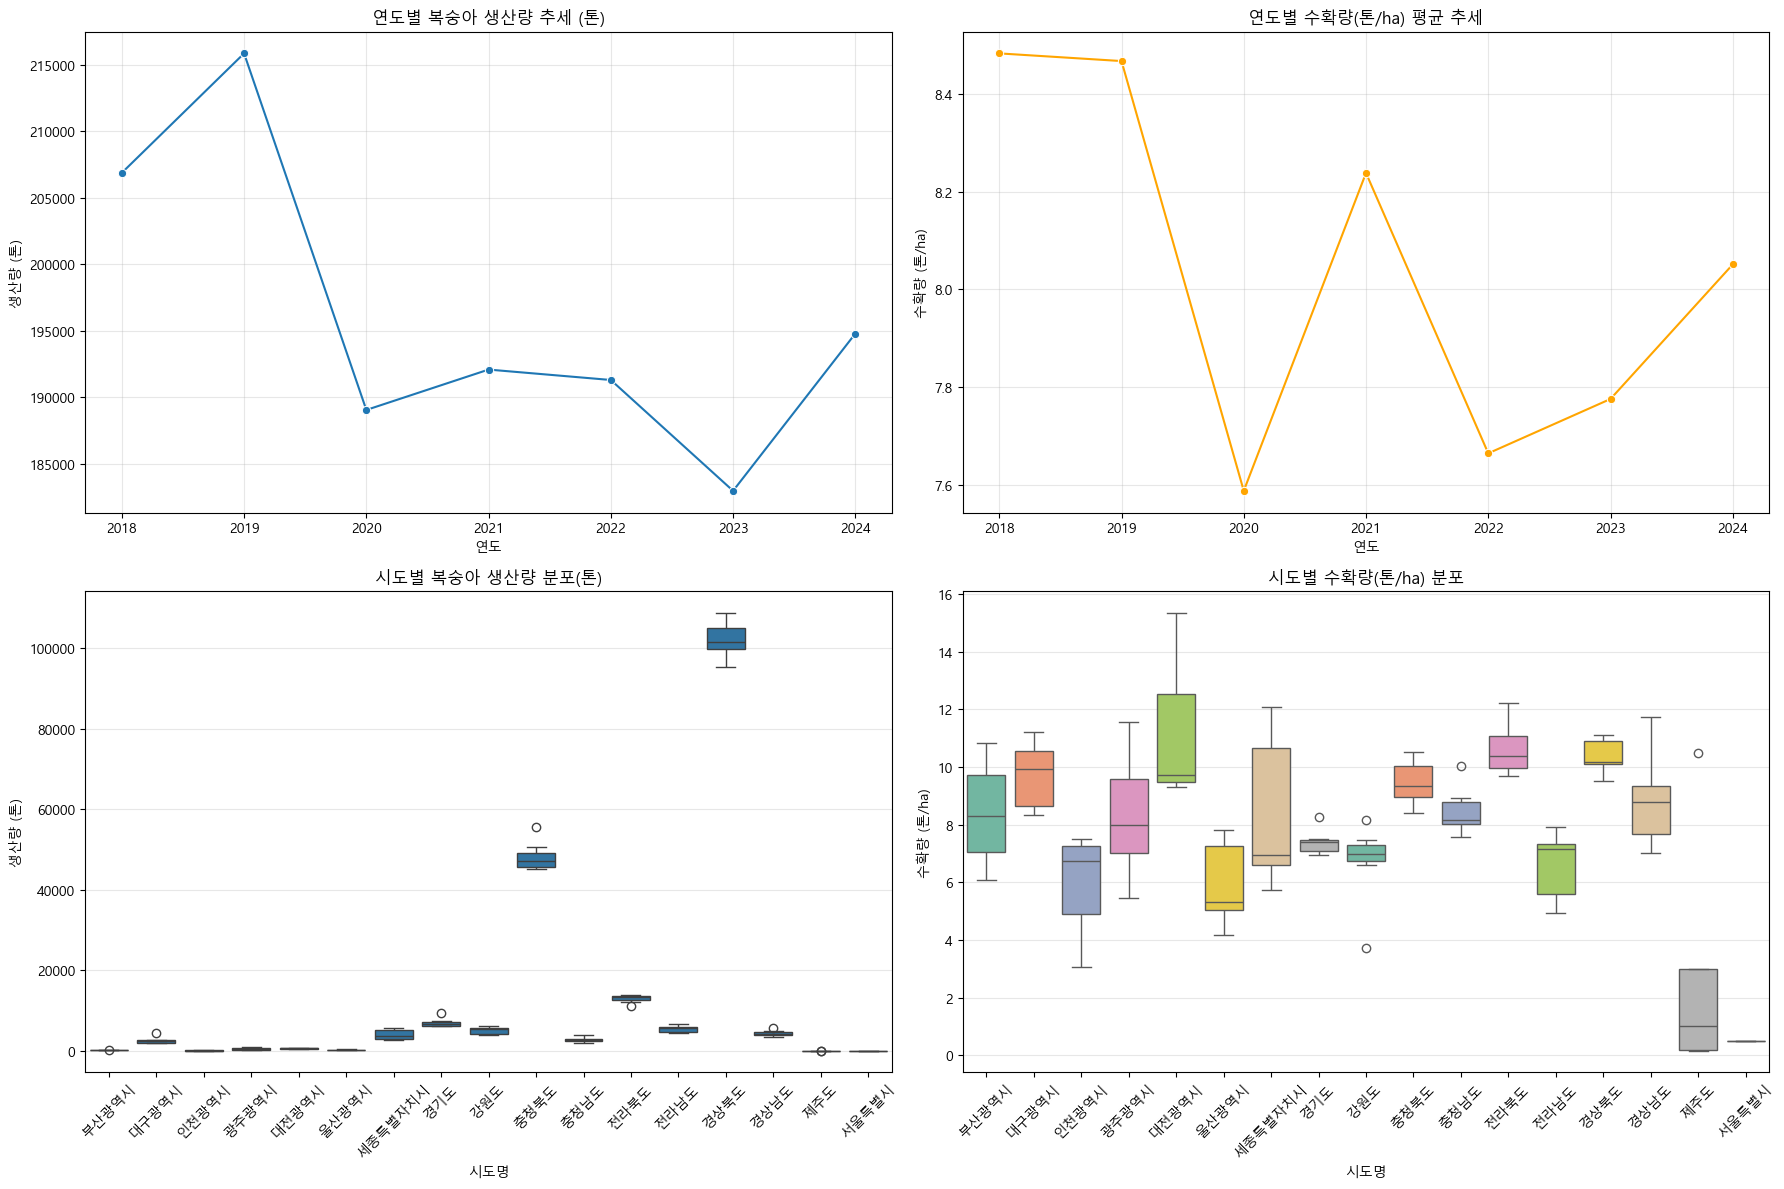

In [2]:
# 생산량, 수확량 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ----------------------------------------------------------
#  데이터 전처리
# ----------------------------------------------------------
annual_prod = df.groupby("연도")["복숭아:생산량 (톤)"].sum().reset_index()
annual_yield = df.groupby("연도")["수확량(톤/ha)"].mean().reset_index()

# ----------------------------------------------------------
#  2×2 subplot 생성
# ----------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# ==========================================================
# (1,1) 연도별 생산량 추세
# ==========================================================
sns.lineplot(
    data=annual_prod,
    x="연도",
    y="복숭아:생산량 (톤)",
    marker="o",
    ax=axes[0][0]
)
axes[0][0].set_title("연도별 복숭아 생산량 추세 (톤)")
axes[0][0].set_ylabel("생산량 (톤)")
axes[0][0].grid(True, alpha=0.3)

# ==========================================================
# (1,2) 연도별 수확량 추세
# ==========================================================
sns.lineplot(
    data=annual_yield,
    x="연도",
    y="수확량(톤/ha)",
    marker="o",
    color="orange",
    ax=axes[0][1]
)
axes[0][1].set_title("연도별 수확량(톤/ha) 평균 추세")
axes[0][1].set_ylabel("수확량 (톤/ha)")
axes[0][1].grid(True, alpha=0.3)

# ==========================================================
# (2,1) 시도별 생산량 Boxplot
# ==========================================================
sns.boxplot(
    data=df,
    x="시도명",
    y="복숭아:생산량 (톤)",
    ax=axes[1][0]
)
axes[1][0].set_title("시도별 복숭아 생산량 분포(톤)")
axes[1][0].set_xlabel("시도명")
axes[1][0].set_ylabel("생산량 (톤)")
axes[1][0].tick_params(axis='x', rotation=45)
axes[1][0].grid(True, axis='y', alpha=0.3)

# ==========================================================
# (2,2) 시도별 수확량(톤/ha) Boxplot
# ==========================================================
sns.boxplot(
    data=df,
    x="시도명",
    y="수확량(톤/ha)",
    ax=axes[1][1],
    palette="Set2"
)
axes[1][1].set_title("시도별 수확량(톤/ha) 분포")
axes[1][1].set_xlabel("시도명")
axes[1][1].set_ylabel("수확량 (톤/ha)")
axes[1][1].tick_params(axis='x', rotation=45)
axes[1][1].grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 스트레스 변수 분포 시각화

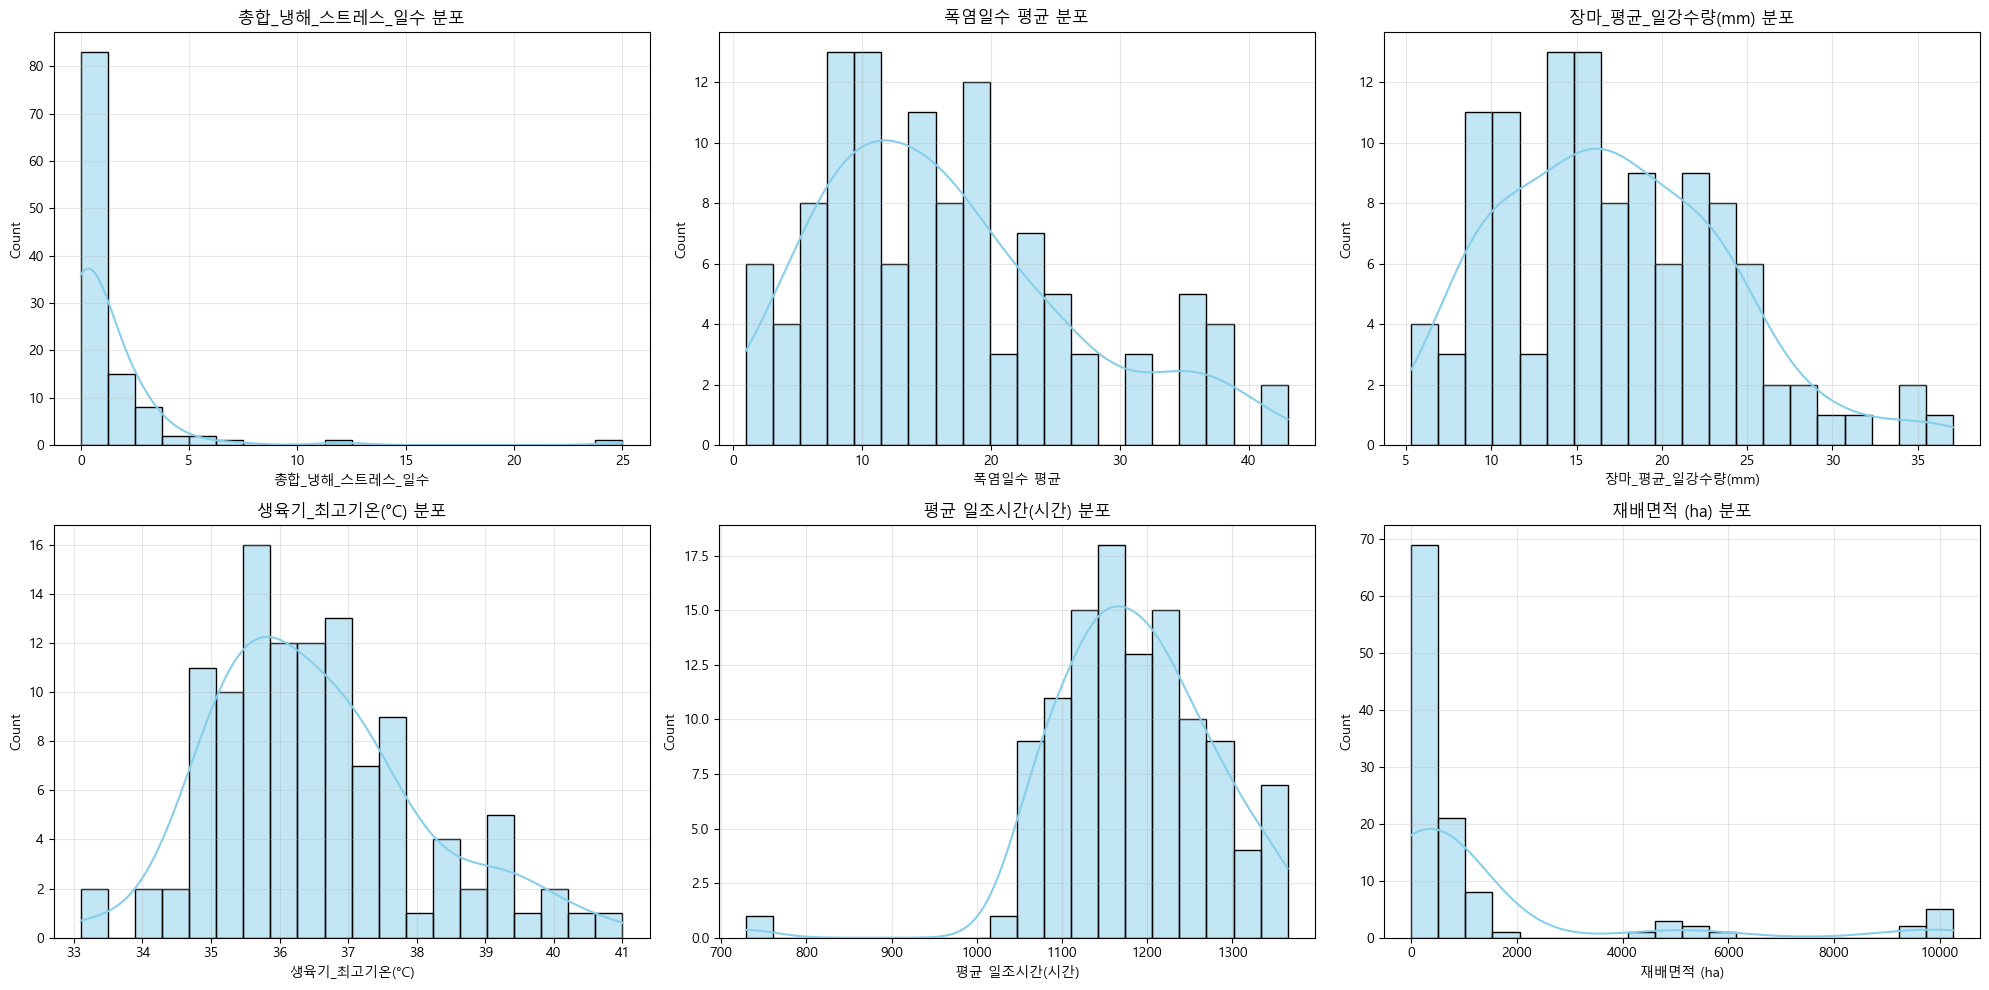

In [3]:
# 스트레스 변수 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------------------------------------
# 시각화 대상 변수
# -----------------------------------------------------------
vars_stress = [
    "총합_냉해_스트레스_일수",
    "폭염일수 평균",
    "장마_평균_일강수량(mm)",
    "생육기_최고기온(°C)",
    "평균 일조시간(시간)",
    "재배면적 (ha)"
]

# -----------------------------------------------------------
# 2×3 subplot 생성
# -----------------------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for ax, col in zip(axes.flatten(), vars_stress):
    sns.histplot(df[col], kde=True, ax=ax, bins=20, color="skyblue")
    ax.set_title(f"{col} 분포")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Feature Engineering

In [4]:
# ------------------------------------------------------
# 3. Feature Engineering
# ------------------------------------------------------
df = df.copy()

# 1) 시도명 더미 추가 (원본 시도명 유지)
dummies = pd.get_dummies(df["시도명"], prefix="시도명", drop_first=True)
df = pd.concat([df, dummies], axis=1)

# 2) 로그 변환 적용해야 하는 변수만 변환
df["냉해스트레스_log"] = np.log1p(df["총합_냉해_스트레스_일수"])
df["면적_log"] = np.log1p(df[area_col])


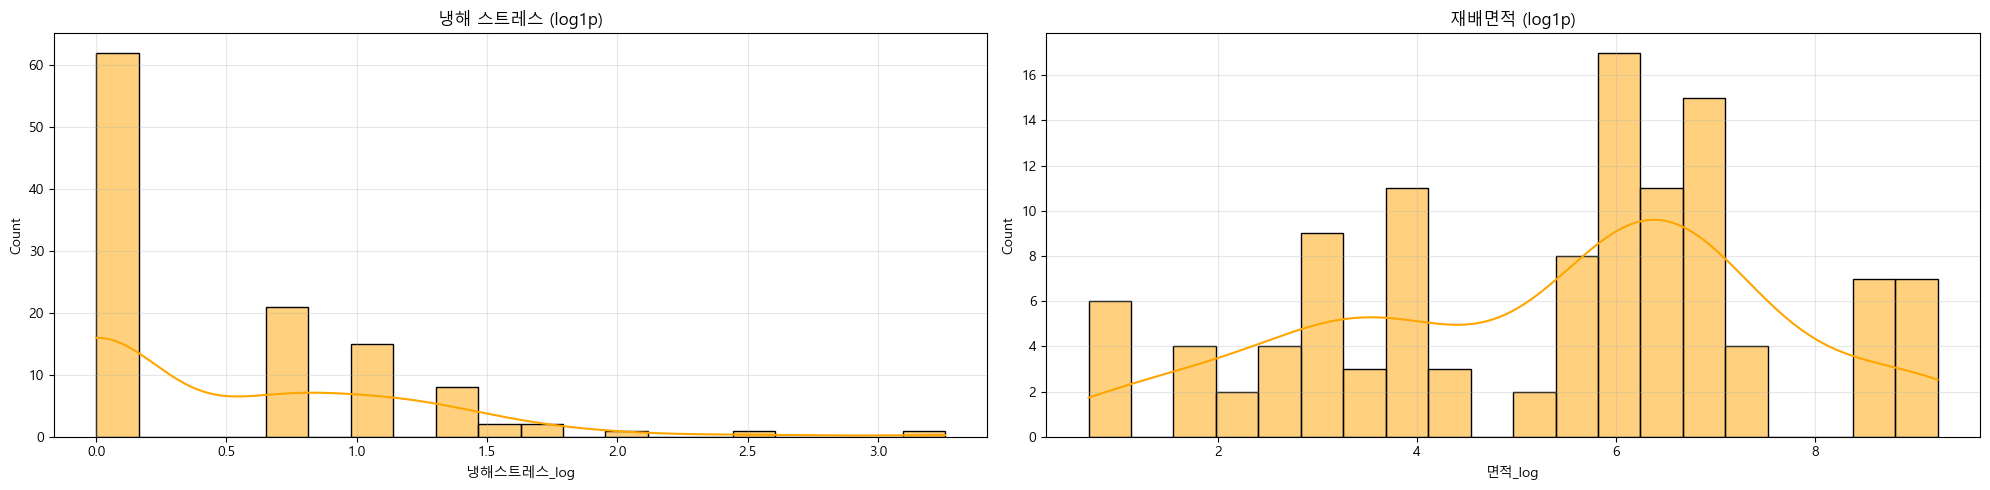

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# -------------------------------------------
# 로그 적용된 3개 변수
# -------------------------------------------
log_vars = [
    ("냉해스트레스_log", "냉해 스트레스 (log1p)"),
    ("면적_log", "재배면적 (log1p)")
]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

for ax, (col, title) in zip(axes, log_vars):
    sns.histplot(df[col], kde=True, bins=20, ax=ax, color="orange")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 스트레스 변수 간 상관관계 시각화

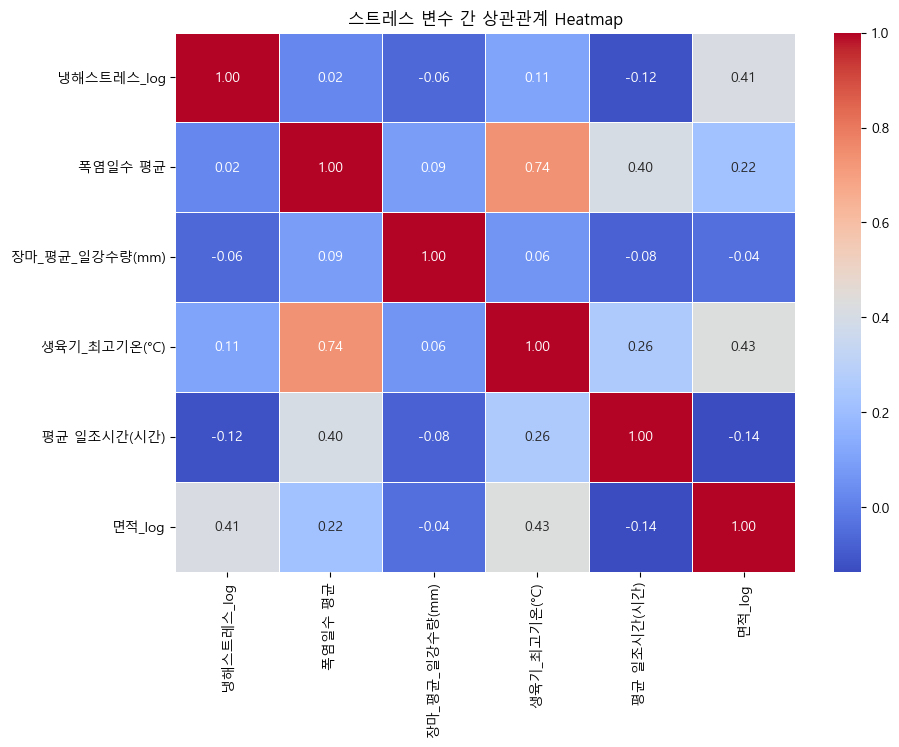

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

stress_vars = [
    "냉해스트레스_log",
    "폭염일수 평균",
    "장마_평균_일강수량(mm)",
    "생육기_최고기온(°C)",
    "평균 일조시간(시간)",
    "면적_log"
]

plt.figure(figsize=(10, 7))
sns.heatmap(
    df[stress_vars].corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("스트레스 변수 간 상관관계 Heatmap")
plt.show()



### 수확량과 스트레스 변수 시각화

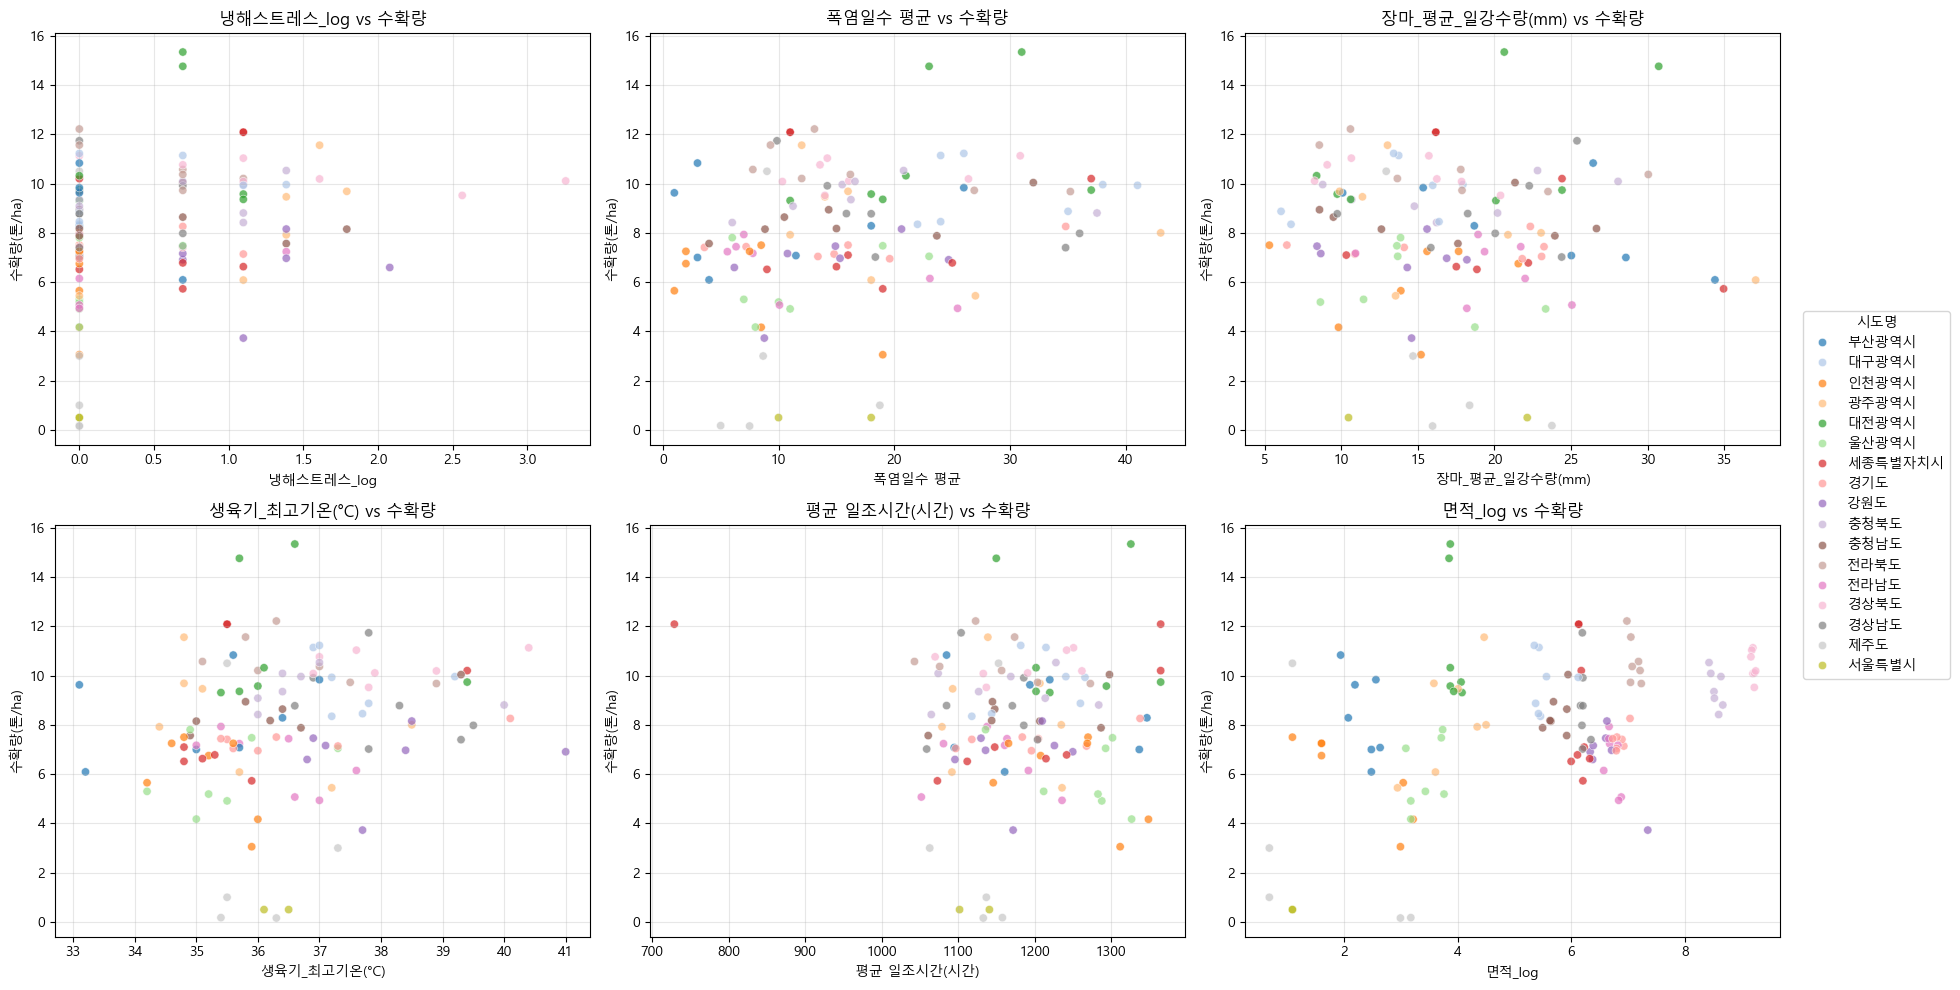

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 수확량 변수
y_col = "수확량(톤/ha)"

# 스트레스 변수 목록
stress_vars = [
    "냉해스트레스_log",
    "폭염일수 평균",
    "장마_평균_일강수량(mm)",
    "생육기_최고기온(°C)",
    "평균 일조시간(시간)",
    "면적_log"
]

# 2×3 subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

handles, labels = None, None

for idx, (ax, col) in enumerate(zip(axes.flatten(), stress_vars)):

    if idx == 0:
        sc = sns.scatterplot(
            data=df,
            x=col,
            y=y_col,
            hue="시도명",
            palette="tab20",
            alpha=0.7,
            ax=ax,
            legend=True
        )
        handles, labels = ax.get_legend_handles_labels()
        ax.legend().remove()

    else:
        sns.scatterplot(
            data=df,
            x=col,
            y=y_col,
            hue="시도명",
            palette="tab20",
            alpha=0.7,
            ax=ax,
            legend=False
        )

    ax.set_title(f"{col} vs 수확량")
    ax.grid(alpha=0.3)

# 공통 범례를 오른쪽에 추가
fig.legend(
    handles,
    labels,
    title="시도명",
    loc="center right",
    bbox_to_anchor=(1.09, 0.5)   # 오른쪽 바깥으로 위치
)

plt.tight_layout(rect=[0, 0, 1, 1])  # 범례 공간 확보
plt.show()


### 두 종류의 모델(RandomForest, XGBoost)로 학습

In [8]:
# ------------------------------------------------------
# 4. Train/Test Split
# ------------------------------------------------------

train_df = df[df["연도"] != 2024].copy()
test_df  = df[df["연도"] == 2024].copy()

drop_cols = [
    "연도",
    target_col,
    target_y,
    area_col,
    "시도명",
]

feature_cols = [c for c in df.columns if c not in drop_cols]

# XGBoost dtype 문제를 막기 위해 float 변환 후 numpy로 변환
X_train = train_df[feature_cols].astype(float)
X_test  = test_df[feature_cols].astype(float)

y_train = train_df[target_y].astype(float).values
y_test  = test_df[target_y].astype(float).values


# ------------------------------------------------------
# 5-1. RandomForest 학습
# ------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

# RF 예측
rf_pred_yield = rf_model.predict(X_test)
rf_pred_production = rf_pred_yield * test_df[area_col].values

rf_result_df = test_df.copy()
rf_result_df["예측_수확량_ha_RF"] = rf_pred_yield
rf_result_df["예측_생산량_RF(톤)"] = rf_pred_production
rf_result_df["오차_RF(톤)"] = rf_pred_production - test_df[target_col].values


# ------------------------------------------------------
# 5-2. XGBoost 학습
# ------------------------------------------------------
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    objective="reg:squarederror"
)

xgb_model.fit(X_train.values, y_train)

xgb_pred_yield = xgb_model.predict(X_test.values)
xgb_pred_production = xgb_pred_yield * test_df[area_col].values

xgb_result_df = test_df.copy()
xgb_result_df["예측_수확량_ha_XGB"] = xgb_pred_yield
xgb_result_df["예측_생산량_XGB(톤)"] = xgb_pred_production
xgb_result_df["오차_XGB(톤)"] = xgb_pred_production - test_df[target_col].values


### 모델 성능 비교

In [9]:
# ------------------------------------------------------
# 6. 모델 성능 평가
# ------------------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print("\n==============================")
print("    평균 Test 성능 (RandomForest)")
print("==============================")

# RF 성능 계산
rf_actual = test_df[target_col].values
rf_pred   = rf_result_df["예측_생산량_RF(톤)"].values

rf_mae  = mean_absolute_error(rf_actual, rf_pred)
rf_mse  = mean_squared_error(rf_actual, rf_pred)
rf_rmse = np.sqrt(rf_mse)

rf_mean = rf_actual.mean()

rf_mae_pct  = (rf_mae  / rf_mean) * 100
rf_rmse_pct = (rf_rmse / rf_mean) * 100

print(f"MAE  : {rf_mae:.4f}")
print(f"RMSE : {rf_rmse:.4f}")
print(f"MAE%  : {rf_mae_pct:.2f}%")
print(f"RMSE% : {rf_rmse_pct:.2f}%")


print("\n==============================")
print("    평균 Test 성능 (XGBoost)")
print("==============================")

# XGB 성능 계산
xgb_actual = test_df[target_col].values
xgb_pred   = xgb_result_df["예측_생산량_XGB(톤)"].values

xgb_mae  = mean_absolute_error(xgb_actual, xgb_pred)
xgb_mse  = mean_squared_error(xgb_actual, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)

xgb_mean = xgb_actual.mean()

xgb_mae_pct  = (xgb_mae  / xgb_mean) * 100
xgb_rmse_pct = (xgb_rmse / xgb_mean) * 100

print(f"MAE  : {xgb_mae:.4f}")
print(f"RMSE : {xgb_rmse:.4f}")
print(f"MAE%  : {xgb_mae_pct:.2f}%")
print(f"RMSE% : {xgb_rmse_pct:.2f}%")



    평균 Test 성능 (RandomForest)
MAE  : 573.3244
RMSE : 1183.4782
MAE%  : 4.71%
RMSE% : 9.72%

    평균 Test 성능 (XGBoost)
MAE  : 1173.2094
RMSE : 2881.1506
MAE%  : 9.64%
RMSE% : 23.66%


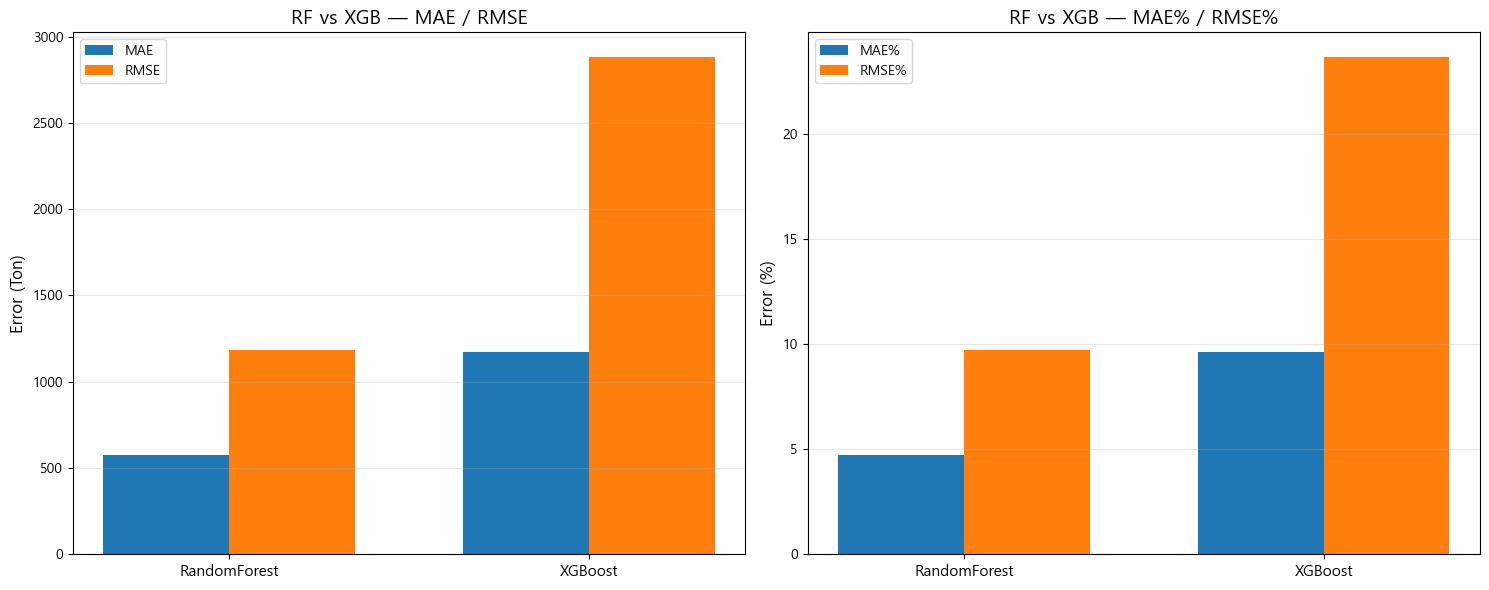

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------
# 데이터 준비
# --------------------------------
models = ["RandomForest", "XGBoost"]

mae_values = [rf_mae, xgb_mae]
rmse_values = [rf_rmse, xgb_rmse]

mae_pct_values = [rf_mae_pct, xgb_mae_pct]
rmse_pct_values = [rf_rmse_pct, xgb_rmse_pct]

x = np.arange(len(models))
width = 0.35

# --------------------------------
# 1행 2열 subplot
# --------------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# -------------------------------
# (1) MAE / RMSE 비교
# -------------------------------
ax = axes[0]

ax.bar(x - width/2, mae_values, width, label="MAE")
ax.bar(x + width/2, rmse_values, width, label="RMSE")

ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylabel("Error (Ton)", fontsize=12)
ax.set_title("RF vs XGB — MAE / RMSE", fontsize=14)
ax.legend()
ax.grid(axis="y", alpha=0.3)

# -------------------------------
# (2) MAE% / RMSE% 비교
# -------------------------------
ax = axes[1]

ax.bar(x - width/2, mae_pct_values, width, label="MAE%")
ax.bar(x + width/2, rmse_pct_values, width, label="RMSE%")

ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylabel("Error (%)", fontsize=12)
ax.set_title("RF vs XGB — MAE% / RMSE%", fontsize=14)
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


### 지역별 오차 비교

In [11]:
# ------------------------------------------------------
# 7-1 지역별 오차 — RandomForest
# ------------------------------------------------------
rf_region_error = rf_result_df.groupby("시도명").apply(
    lambda g: pd.Series({
        "실제": g[target_col].mean(),
        "예측": g["예측_생산량_RF(톤)"].mean(),
        "MAE": mean_absolute_error(g[target_col], g["예측_생산량_RF(톤)"]),
        "MAE%": mean_absolute_error(g[target_col], g["예측_생산량_RF(톤)"]) / g[target_col].mean() * 100
    }),
    include_groups=False 
).reset_index()

print("\n==============================")
print("    지역별 오차 — RandomForest")
print("==============================")
print(rf_region_error.to_string(index=False))



    지역별 오차 — RandomForest
    시도명       실제            예측         MAE       MAE%
    강원도   6124.0   6005.993675  118.006325   1.926948
    경기도   6150.0   6462.087714  312.087714   5.074597
   경상남도   4195.0   4685.534702  490.534702  11.693318
   경상북도 104457.0 104341.553052  115.446948   0.110521
  광주광역시     98.0    108.238095   10.238095  10.447036
  대구광역시   4498.0   4443.135643   54.864357   1.219750
  대전광역시    721.0    476.836169  244.163831  33.864609
  부산광역시    118.0     80.598861   37.401139  31.695880
세종특별자치시   3031.0   4239.111182 1208.111182  39.858502
  울산광역시    299.0    298.746432    0.253568   0.084805
  인천광역시     29.0     28.088677    0.911323   3.142494
   전라남도   4556.0   6658.555633 2102.555633  46.149158
   전라북도  11058.0  11163.518562  105.518562   0.954228
    제주도      1.0      6.409960    5.409960 540.995993
   충청남도   1907.0   2281.045512  374.045512  19.614343
   충청북도  47559.0  43565.357933 3993.642067   8.397237


In [12]:
# ------------------------------------------------------
# 7-2 지역별 오차 — XGBoost
# ------------------------------------------------------
xgb_region_error = xgb_result_df.groupby("시도명").apply(
    lambda g: pd.Series({
        "실제": g[target_col].mean(),
        "예측": g["예측_생산량_XGB(톤)"].mean(),
        "MAE": mean_absolute_error(g[target_col], g["예측_생산량_XGB(톤)"]),
        "MAE%": mean_absolute_error(g[target_col], g["예측_생산량_XGB(톤)"]) / g[target_col].mean() * 100
    }),
    include_groups=False 
).reset_index()

print("\n==============================")
print("    지역별 오차 — XGBoost")
print("==============================")
print(xgb_region_error.to_string(index=False))


    지역별 오차 — XGBoost
    시도명       실제            예측          MAE       MAE%
    강원도   6124.0   5099.645927  1024.354073  16.726879
    경기도   6150.0   6142.390416     7.609584   0.123733
   경상남도   4195.0   4652.934666   457.934666  10.916202
   경상북도 104457.0 106273.231060  1816.231060   1.738736
  광주광역시     98.0    131.637317    33.637317  34.323793
  대구광역시   4498.0   4542.654136    44.654136   0.992755
  대전광역시    721.0    527.533512   193.466488  26.833077
  부산광역시    118.0     90.175043    27.824957  23.580472
세종특별자치시   3031.0   4303.475687  1272.475687  41.982042
  울산광역시    299.0    293.281116     5.718884   1.912670
  인천광역시     29.0     25.946671     3.053329  10.528722
   전라남도   4556.0   7034.728577  2478.728577  54.405807
   전라북도  11058.0  11035.053343    22.946657   0.207512
    제주도      1.0      5.212376     4.212376 421.237564
   충청남도   1907.0   2318.073341   411.073341  21.556022
   충청북도  47559.0  36591.570080 10967.429920  23.060682


C:\Users\sindd\AppData\Local\Temp\ipykernel_16452\1603571743.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rf_jeju = float(rf_region_error[rf_region_error["시도명"] == "제주도"]["MAE%"])
C:\Users\sindd\AppData\Local\Temp\ipykernel_16452\1603571743.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  xgb_jeju = float(xgb_region_error[xgb_region_error["시도명"] == "제주도"]["MAE%"])


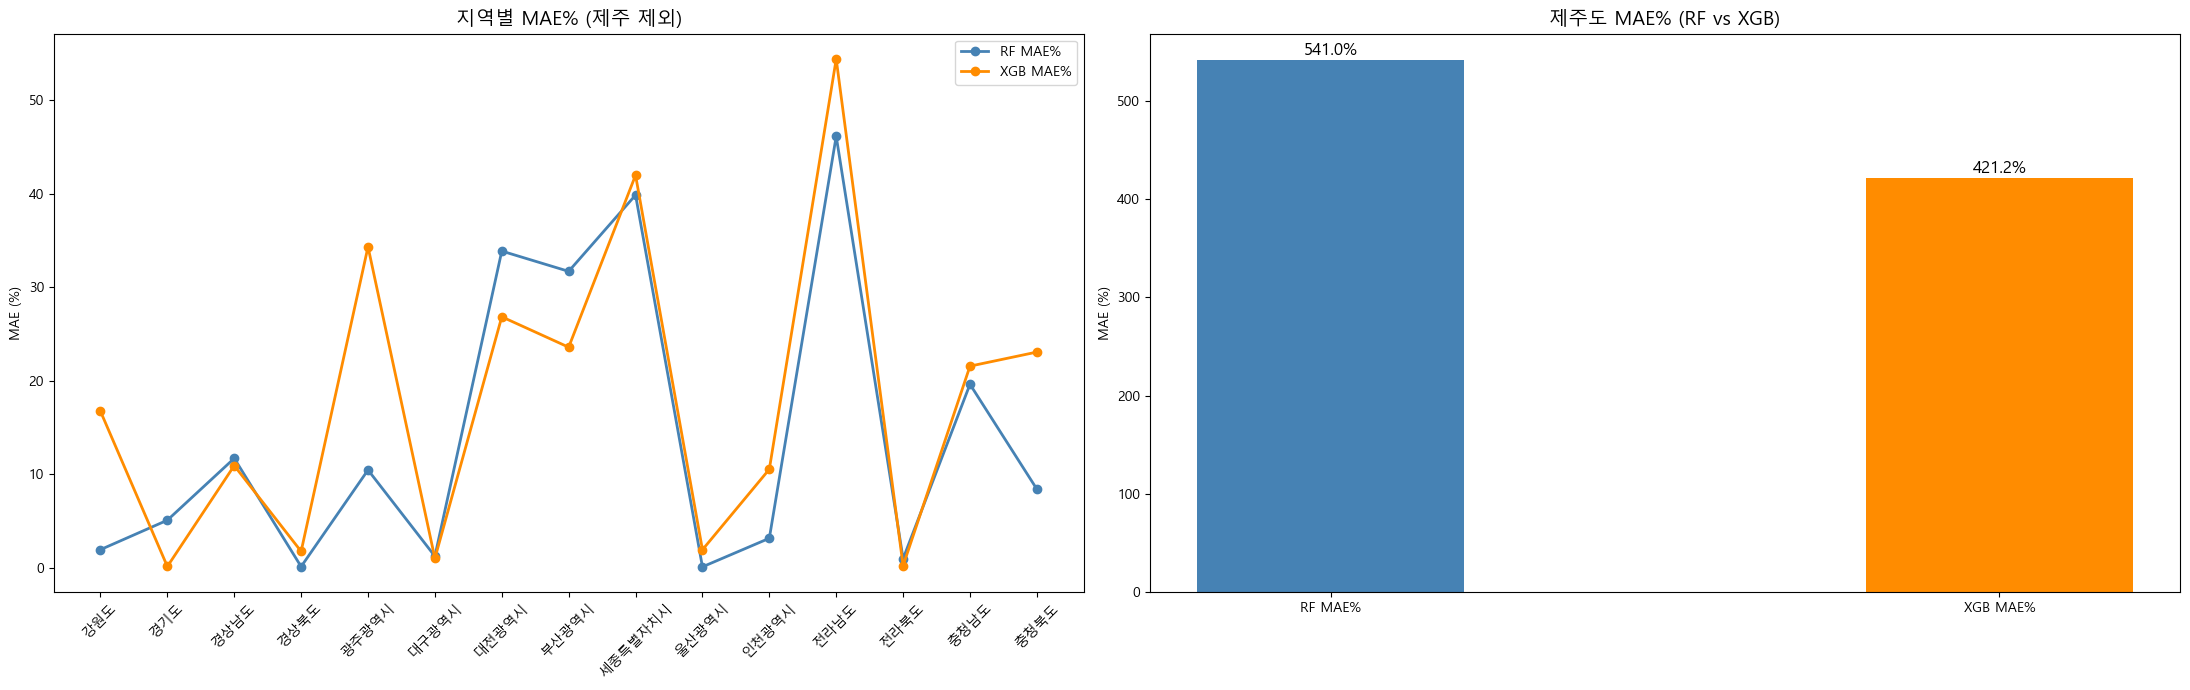

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------
# 제주 분리
# ------------------------------------
rf_normal = rf_region_error[rf_region_error["시도명"] != "제주도"]
xgb_normal = xgb_region_error[xgb_region_error["시도명"] != "제주도"]

rf_jeju = float(rf_region_error[rf_region_error["시도명"] == "제주도"]["MAE%"])
xgb_jeju = float(xgb_region_error[xgb_region_error["시도명"] == "제주도"]["MAE%"])

# ------------------------------------
# 플롯 생성 (1×2)
# ------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(22, 7))

# ====================================
# LEFT : 제주 제외 / RF & XGB 겹쳐 그림
# ====================================
ax = axes[0]

ax.plot(rf_normal["시도명"], rf_normal["MAE%"],
        marker='o', color="steelblue", label="RF MAE%", linewidth=2)

ax.plot(xgb_normal["시도명"], xgb_normal["MAE%"],
        marker='o', color="darkorange", label="XGB MAE%", linewidth=2)

ax.set_title("지역별 MAE% (제주 제외)", fontsize=14)
ax.set_ylabel("MAE (%)")
ax.tick_params(axis='x', rotation=45)
ax.legend()

# ====================================
# RIGHT : 제주 단독 / RF & XGB bar (폭 좁게)
# ====================================
ax = axes[1]

models = ["RF MAE%", "XGB MAE%"]
values = [rf_jeju, xgb_jeju]
colors = ["steelblue", "darkorange"]

# 폭 좁은 바
ax.bar(models, values, color=colors, width=0.4)

# 값 표시
for i, v in enumerate(values):
    ax.text(i, v + 5, f"{v:.1f}%", ha="center", fontsize=12)

ax.set_title("제주도 MAE% (RF vs XGB)", fontsize=14)
ax.set_ylabel("MAE (%)")

plt.tight_layout()
plt.show()


### 지역별 2024년 예측 결과

In [14]:
# ------------------------------------------------------
# 8. 2024년 예측 결과 출력 (RandomForest)
# ------------------------------------------------------
print("\n==============================")
print("   2024년 복숭아 생산량 예측 결과 (RandomForest)")
print("==============================")

print(
    rf_result_df[
        [
            "시도명",
            "연도",
            target_col,
            "예측_생산량_RF(톤)",
            "오차_RF(톤)"
        ]
    ].to_string(index=False)
)



   2024년 복숭아 생산량 예측 결과 (RandomForest)
    시도명   연도  복숭아:생산량 (톤)  예측_생산량_RF(톤)     오차_RF(톤)
  부산광역시 2024          118     80.598861   -37.401139
  대구광역시 2024         4498   4443.135643   -54.864357
  인천광역시 2024           29     28.088677    -0.911323
  광주광역시 2024           98    108.238095    10.238095
  대전광역시 2024          721    476.836169  -244.163831
  울산광역시 2024          299    298.746432    -0.253568
세종특별자치시 2024         3031   4239.111182  1208.111182
    경기도 2024         6150   6462.087714   312.087714
    강원도 2024         6124   6005.993675  -118.006325
   충청북도 2024        47559  43565.357933 -3993.642067
   충청남도 2024         1907   2281.045512   374.045512
   전라북도 2024        11058  11163.518562   105.518562
   전라남도 2024         4556   6658.555633  2102.555633
   경상북도 2024       104457 104341.553052  -115.446948
   경상남도 2024         4195   4685.534702   490.534702
    제주도 2024            1      6.409960     5.409960


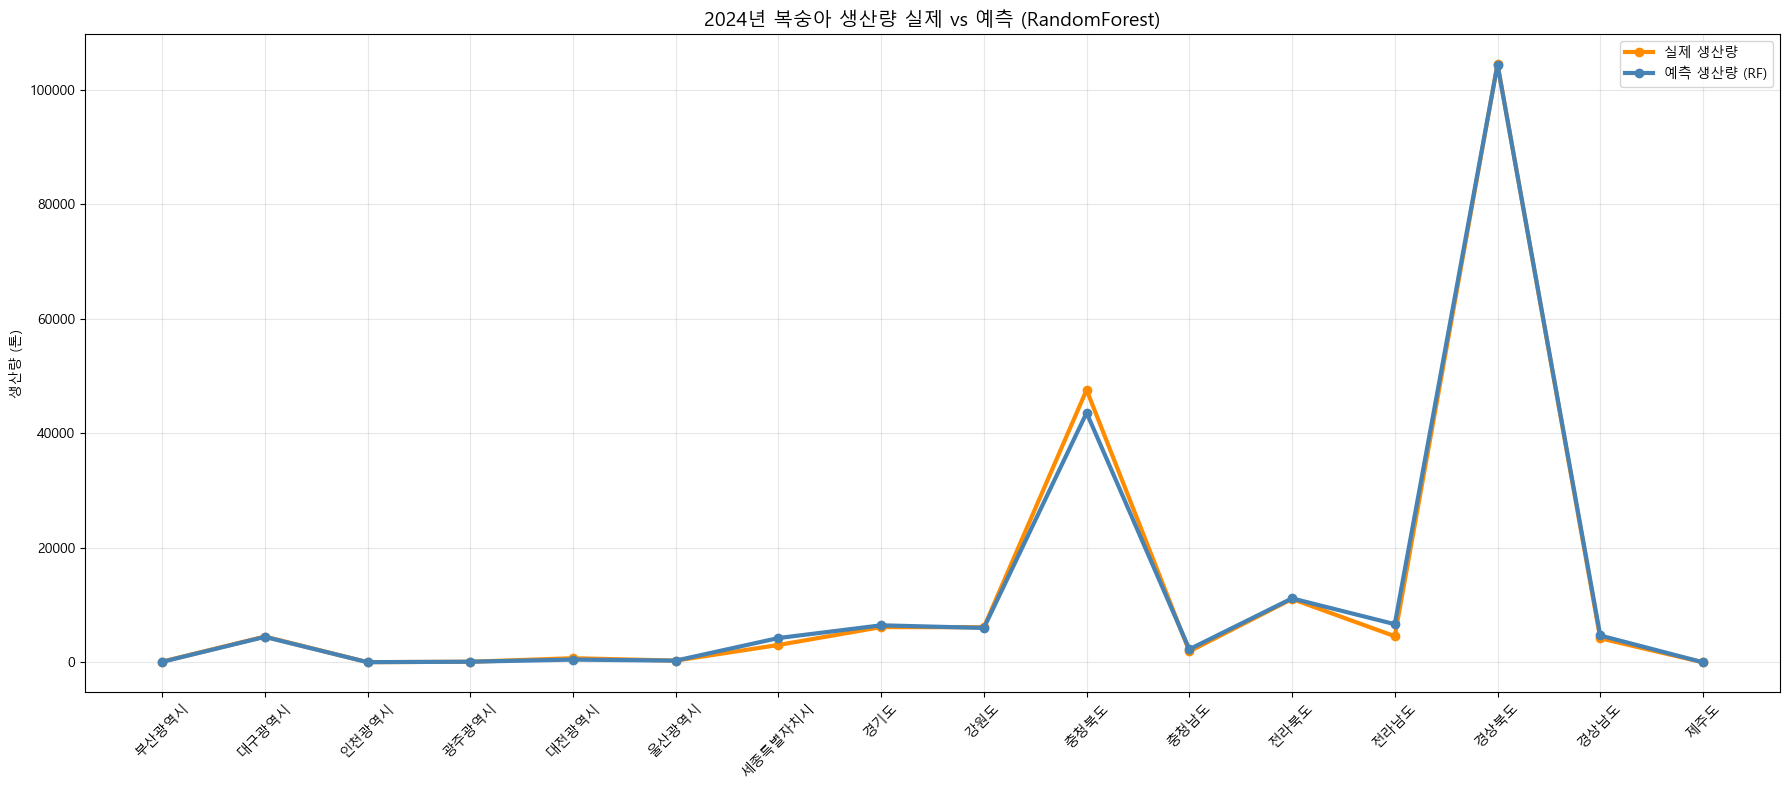

In [15]:
# ------------------------------------------------------
# 9. 2024년 실제 vs 예측 시각화 (RandomForest)
# ------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))

# 실제 생산량
plt.plot(
    rf_result_df["시도명"],
    rf_result_df[target_col],
    marker='o', linewidth=3, color="darkorange",
    label="실제 생산량"
)

# 예측 생산량 (RF)
plt.plot(
    rf_result_df["시도명"],
    rf_result_df["예측_생산량_RF(톤)"],
    marker='o', linewidth=3, color="steelblue",
    label="예측 생산량 (RF)"
)

plt.title("2024년 복숭아 생산량 실제 vs 예측 (RandomForest)", fontsize=14)
plt.ylabel("생산량 (톤)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### 변수 중요도

In [16]:
# ------------------------------------------------------
# 9. RandomForest 변수 중요도 정리
# ------------------------------------------------------

rf_features = rf_model.feature_names_in_
rf_importance = rf_model.feature_importances_

rf_coef_df = pd.DataFrame({
    "변수명": rf_features,
    "중요도": rf_importance
}).sort_values("중요도", ascending=False)



In [17]:
# ------------------------------------------------------
# 10. 스트레스 변수 / 지역 변수 분리 출력
# ------------------------------------------------------

# RandomForest가 실제로 사용한 변수 중요도 테이블 (이전 단계에서 만든 것)
# rf_coef_df = DataFrame(변수명, 중요도, 절대값)

stress_vars = [
    "냉해스트레스_log",
    "폭염일수 평균",
    "장마_평균_일강수량(mm)",
    "생육기_최고기온(°C)",
    "평균 일조시간(시간)",
    "면적_log"
]

# 시도명 더미
region_vars = [v for v in rf_coef_df["변수명"] if v.startswith("시도명_")]

print("\n==============================")
print("   스트레스 변수 영향력 (RandomForest)")
print("==============================")
stress_coef_rf = rf_coef_df[rf_coef_df["변수명"].isin(stress_vars)]
print(stress_coef_rf.to_string(index=False))



   스트레스 변수 영향력 (RandomForest)
           변수명      중요도
        면적_log 0.425866
       폭염일수 평균 0.113011
  생육기_최고기온(°C) 0.080493
장마_평균_일강수량(mm) 0.079109
   평균 일조시간(시간) 0.076961
    냉해스트레스_log 0.008025


In [18]:
print("\n==============================")
print("   시도명(지역) 변수 영향력 (RandomForest)")
print("==============================")
region_coef_rf = rf_coef_df[rf_coef_df["변수명"].isin(region_vars)]
print(region_coef_rf.to_string(index=False))


   시도명(지역) 변수 영향력 (RandomForest)
        변수명      중요도
  시도명_서울특별시 0.065997
    시도명_제주도 0.050405
  시도명_부산광역시 0.020465
   시도명_전라북도 0.012360
  시도명_울산광역시 0.011023
  시도명_인천광역시 0.010804
   시도명_전라남도 0.008743
  시도명_대전광역시 0.008008
시도명_세종특별자치시 0.007169
   시도명_경상남도 0.003719
    시도명_경기도 0.003570
   시도명_충청북도 0.003115
  시도명_대구광역시 0.001700
  시도명_광주광역시 0.001324
   시도명_충청남도 0.001221
   시도명_경상북도 0.000737


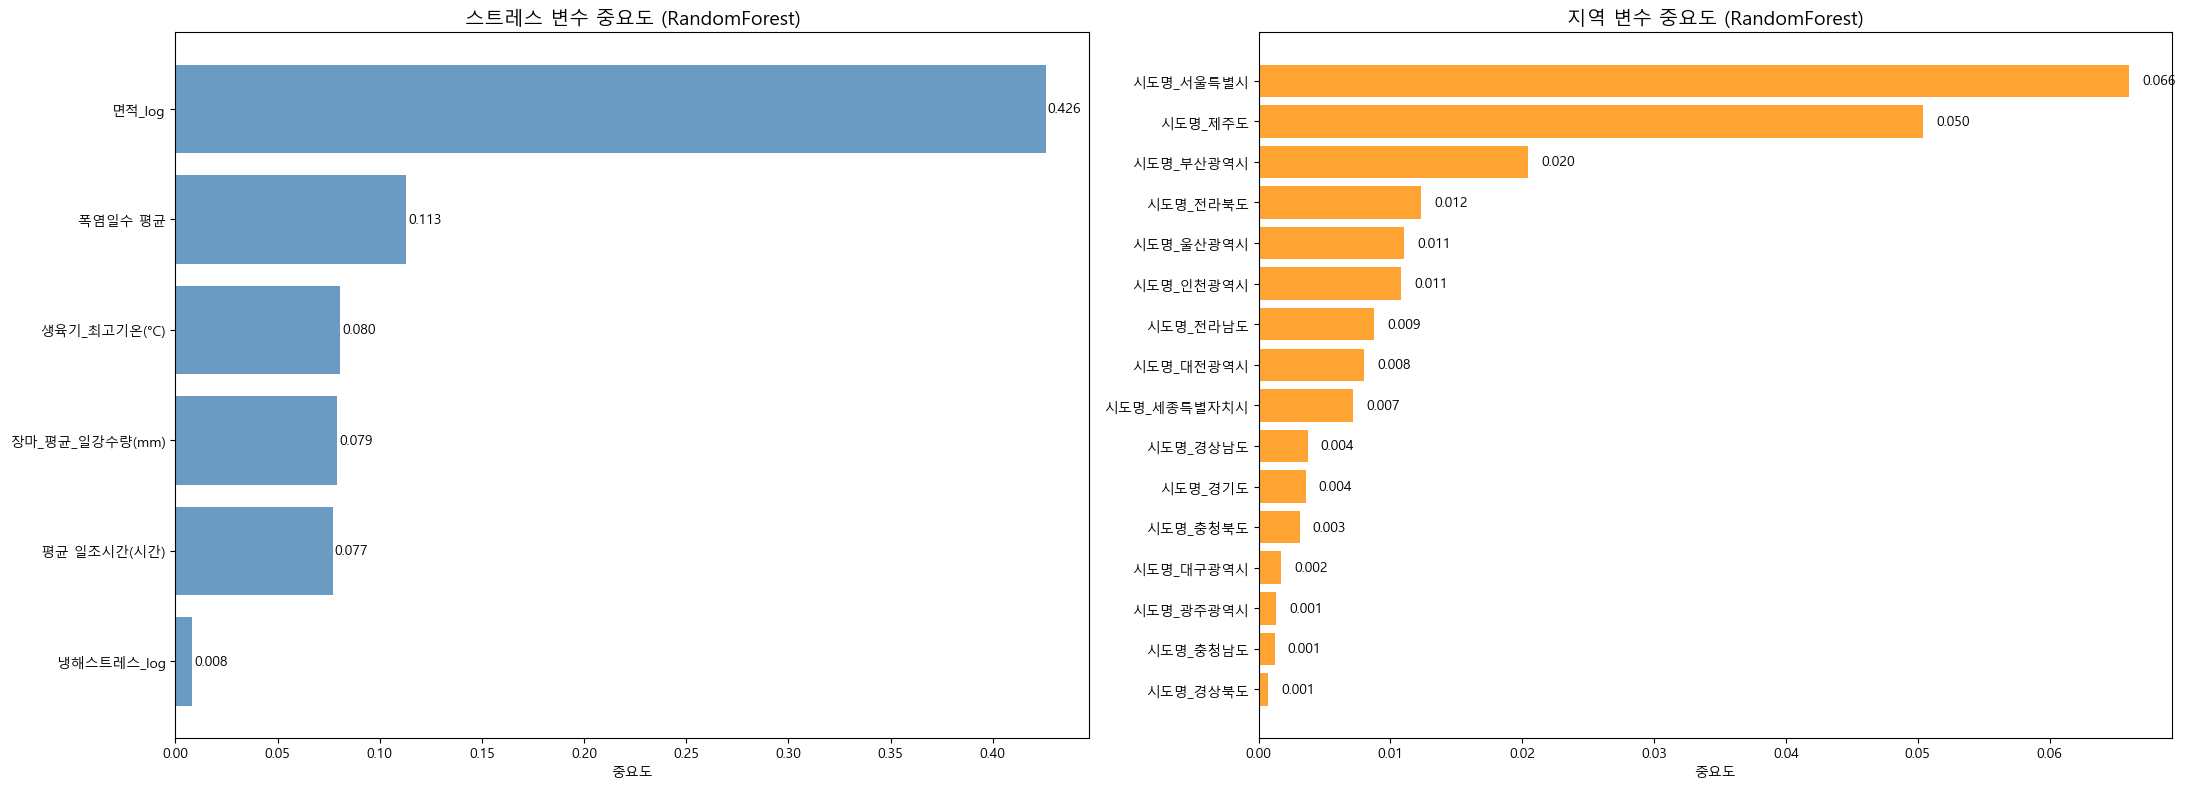

In [19]:
# ------------------------------------------------------
# 11. 스트레스 변수 / 지역 변수 중요도 시각화 (RandomForest)
# ------------------------------------------------------
import matplotlib.pyplot as plt

# 시각화용 데이터 준비
stress_plot_df = stress_coef_rf.sort_values("중요도", ascending=True)
region_plot_df = region_coef_rf.sort_values("중요도", ascending=True)

# Figure 생성 (1×2)
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# ==========================================
# LEFT : 스트레스 변수 중요도
# ==========================================
ax = axes[0]
ax.barh(stress_plot_df["변수명"], stress_plot_df["중요도"],
        color="steelblue", alpha=0.8)

ax.set_title("스트레스 변수 중요도 (RandomForest)", fontsize=14)
ax.set_xlabel("중요도")

# 값 라벨 표시
for i, v in enumerate(stress_plot_df["중요도"]):
    ax.text(v + 0.001, i, f"{v:.3f}", va="center")

# ==========================================
# RIGHT : 지역 변수 중요도
# ==========================================
ax = axes[1]
ax.barh(region_plot_df["변수명"], region_plot_df["중요도"],
        color="darkorange", alpha=0.8)

ax.set_title("지역 변수 중요도 (RandomForest)", fontsize=14)
ax.set_xlabel("중요도")

# 값 라벨 표시
for i, v in enumerate(region_plot_df["중요도"]):
    ax.text(v + 0.001, i, f"{v:.3f}", va="center")

plt.tight_layout()
plt.show()
